In [5]:
import sys
import matplotlib.colors as clr
import numpy as np
import matplotlib.pyplot as plt
import os
import fitsio as fio
import glob
from tqdm import tqdm
from astropy.io import fits
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

In [6]:
Roman_truth_file = '/global/cscratch1/sd/zg64/Rubin-Roman-Redmagic/dc2_truth_gal_icrs.fits'
aa = fio.FITS(Roman_truth_file)[-1]
Roman_z = aa.read_column('z')

In [7]:
Roman_output_dir = '/global/cscratch1/sd/zg64/Rubin-Roman-Redmagic/dc2_sim_output/'
Roman_match_files = np.sort(glob.glob(os.path.join(Roman_output_dir,'*.fits')))
roman_truth = fio.FITS(Roman_match_files[1])[-1].read()
roman_detection = fio.FITS(Roman_match_files[0])[-1].read()

In [8]:
mm = roman_truth['gal_star'] == 0
roman_ind_all = roman_truth['ind'][mm]

In [9]:
z_all = Roman_z[roman_ind_all]

In [10]:
Red_gal_ind = np.load('data/roman_red_sed_bulge_disk_match_truth_ind.npy')
roman_ind = roman_truth['ind']
matched_inds_in_truth = roman_ind[Red_gal_ind]

zs = Roman_z[matched_inds_in_truth]
measured_qts = roman_detection[Red_gal_ind]
measured_qts_all = roman_detection[mm]

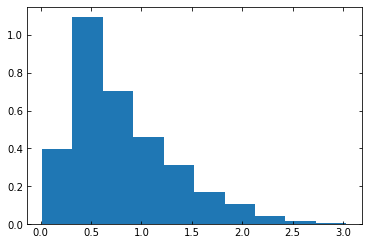

In [12]:
plt.hist(zs,density = True);

In [44]:
roman_z_mask = (z_all > 1.3) & (z_all < 1.32)
z_mask = (zs > 1.3) & (zs < 1.32)
measured_qts[z_mask].shape,measured_qts_all[roman_z_mask].shape

((5881,), (126300,))

In [15]:
def plot_c_vs_m_roman (ax,c1,c2,ref_m,z_mask,data_z_mask,ref_cut):
    fz = 20
    mag_c1 = measured_qts['mag_auto_%s'%c1][z_mask]
    mag_c2 = measured_qts['mag_auto_%s'%c2][z_mask]
    mag_ref = measured_qts['mag_auto_%s'%ref_m][z_mask]
    color = mag_c1-mag_c2
    #print(color)
    mag_c1_data = measured_qts_all['mag_auto_%s'%c1][data_z_mask]
    mag_c2_data = measured_qts_all['mag_auto_%s'%c2][data_z_mask]
    mag_ref_data = measured_qts_all['mag_auto_%s'%ref_m][data_z_mask]
    color_data = mag_c1_data-mag_c2_data
    
    
    CUT = mag_ref < ref_cut
    CUT_all = mag_ref_data < ref_cut
    
    ax.plot(mag_ref_data[CUT_all],color_data[CUT_all],'.')
    ax.plot(mag_ref[CUT],color[CUT],'.')
    #ax.set_ylim(color.mean()-1,color.mean()+1)
    #ax.set_xlim(mag_ref.mean()-5,mag_ref.mean()-1)
    ax.set_ylabel('%s-%s'%(c1,c2),fontsize= 20)
    ax.set_xlabel(ref_m,fontsize = 20)
    print(c1,c2,ref_m)

Y106 J129 F184


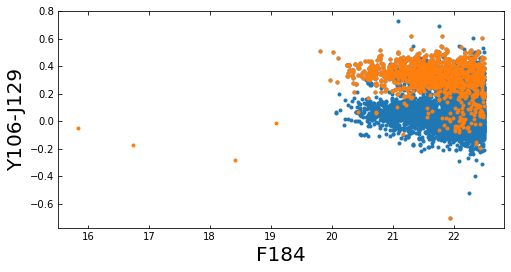

In [16]:
z_low = 1.3
z_high = 1.32
roman_z_mask = (z_all > z_low) & (z_all < z_high)
z_mask = (zs > z_low) & (zs < z_high)
fr = ['Y106','J129','H158','F184']
f,ax = plt.subplots(1,1,figsize = (8,4))
plot_c_vs_m_roman(ax = ax,c1 = fr[0],c2 = fr[1],ref_m=fr[-1],z_mask=z_mask,data_z_mask=roman_z_mask,ref_cut = 22.5)

Y106 J129 F184


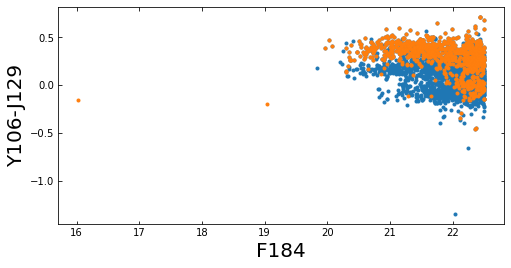

In [17]:
z_low = 1.36
z_high = 1.38
roman_z_mask = (z_all > z_low) & (z_all < z_high)
z_mask = (zs > z_low) & (zs < z_high)
fr = ['Y106','J129','H158','F184']
f,ax = plt.subplots(1,1,figsize = (8,4))
plot_c_vs_m_roman(ax = ax,c1 = fr[0],c2 = fr[1],ref_m=fr[-1],z_mask=z_mask,data_z_mask=roman_z_mask,ref_cut = 22.5)

Y106 J129 F184


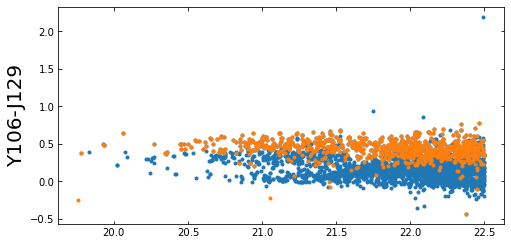

In [106]:
z_low = 1.46
z_high = 1.48
roman_z_mask = (z_all > z_low) & (z_all < z_high)
z_mask = (zs > z_low) & (zs < z_high)

fr = ['Y106','J129','H158','F184']
f,ax = plt.subplots(1,1,figsize = (8,4))
plot_c_vs_m_roman(ax = ax,c1 = fr[0],c2 = fr[1],ref_m=fr[-1],z_mask=z_mask,data_z_mask=roman_z_mask,ref_cut = 22.5)

J129 H158 F184


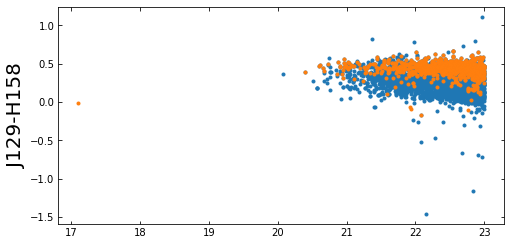

In [113]:
z_low = 1.66
z_high = 1.68
roman_z_mask = (z_all > z_low) & (z_all < z_high)
z_mask = (zs > z_low) & (zs < z_high)

fr = ['Y106','J129','H158','F184']
f,ax = plt.subplots(1,1,figsize = (8,4))
plot_c_vs_m_roman(ax = ax,c1 = fr[1],c2 = fr[2],ref_m=fr[-1],z_mask=z_mask,data_z_mask=roman_z_mask,ref_cut = 23)

J129 H158 F184


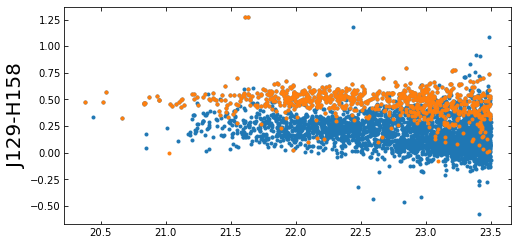

In [112]:
z_low = 1.78
z_high = 1.80
roman_z_mask = (z_all > z_low) & (z_all < z_high)
z_mask = (zs > z_low) & (zs < z_high)

fr = ['Y106','J129','H158','F184']
f,ax = plt.subplots(1,1,figsize = (8,4))
plot_c_vs_m_roman(ax = ax,c1 = fr[1],c2 = fr[2],ref_m=fr[-1],z_mask=z_mask,data_z_mask=roman_z_mask,ref_cut = 23.5)

J129 H158 F184


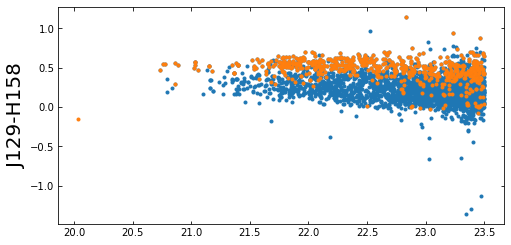

In [114]:
z_low = 1.86
z_high = 1.88
roman_z_mask = (z_all > z_low) & (z_all < z_high)
z_mask = (zs > z_low) & (zs < z_high)

fr = ['Y106','J129','H158','F184']
f,ax = plt.subplots(1,1,figsize = (8,4))
plot_c_vs_m_roman(ax = ax,c1 = fr[1],c2 = fr[2],ref_m=fr[-1],z_mask=z_mask,data_z_mask=roman_z_mask,ref_cut = 23.5)

J129 H158 F184


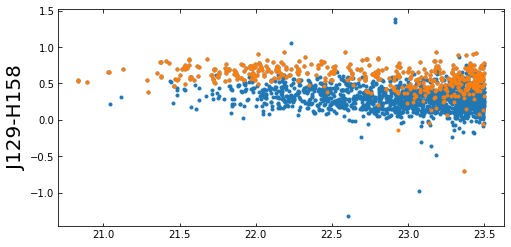

In [118]:
z_low = 2
z_high = 2.02
roman_z_mask = (z_all > z_low) & (z_all < z_high)
z_mask = (zs > z_low) & (zs < z_high)

fr = ['Y106','J129','H158','F184']
f,ax = plt.subplots(1,1,figsize = (8,4))
plot_c_vs_m_roman(ax = ax,c1 = fr[1],c2 = fr[2],ref_m=fr[-1],z_mask=z_mask,data_z_mask=roman_z_mask,ref_cut = 23.5)

H158 F184 F184


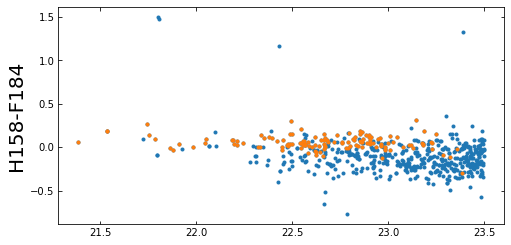

In [125]:
z_low = 2.5
z_high = 2.52
roman_z_mask = (z_all > z_low) & (z_all < z_high)
z_mask = (zs > z_low) & (zs < z_high)

fr = ['Y106','J129','H158','F184']
f,ax = plt.subplots(1,1,figsize = (8,4))
plot_c_vs_m_roman(ax = ax,c1 = fr[2],c2 = fr[3],ref_m=fr[-1],z_mask=z_mask,data_z_mask=roman_z_mask,ref_cut = 23.5)